In [8]:
%matplotlib notebook
from spatialmath import *
from spatialmath.base import *
import matplotlib.pyplot as plt
from math import pi
import numpy as np
import sympy as sp


# extendemos la clase SE3 para poder manejar variables en forma simbolica y numérica
# USO: objeto.symbolReplace([(simbolo1, valor_simbolo1),(simboloN, valor_simboloN)])
class SE3(SE3):
    def symbolReplace(self,symbol_values):
        aux = np.eye(self.A.shape[0])
        for i in range(self.A.shape[0]):
            for j in range(self.A.shape[1]):
                try:
                    aux[i,j] = self.A[i,j].subs(symbol_values).evalf()
                except:
                    pass
        return aux

Problema
Tomemos el robot de 2GDL y colocamos ternas en sus extremos. Sea S0 su origen, S1 el extreme del primer eslabon y S2 el extremo del segundo. Suponiendo que sus variables articulares [Q] = [90,90] y sus dimensiones [L] = [2,10], graficar la posicion de sus ternas.

 °------L1------°-----L2------°
S0

In [25]:
# Definimos simbolos a utilizar
q1,l1, q2, l2 = sp.symbols('Q1,L1,Q2,L2')
S0 = SE3()

In [37]:
S1 = SE3.Rz(q1) * SE3.Tx(l1)
print(S1)

  cos(Q1)      -sin(Q1)     0            L1*cos(Q1)    
  sin(Q1)      cos(Q1)      0            L1*sin(Q1)    
   0         0         1        0             
   0         0         0        1             



In [40]:
S1_eval = S1.symbolReplace([(q1,pi/2),(l1,2)])
print(S1_eval.round())

[[ 0. -1.  0.  0.]
 [ 1.  0.  0. 10.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [41]:
S2 = SE3.Rz(q2) * SE3.Tx(l2)
print(S2)

  cos(Q2)      -sin(Q2)     0            L2*cos(Q2)    
  sin(Q2)      cos(Q2)      0            L2*sin(Q2)    
   0         0         1        0             
   0         0         0        1             



In [42]:
T = S1 * S2
T = T.simplify()
print(T)
T_eval = T.symbolReplace([(q1,pi/2),(l1,2),(q2,pi/2),(l2,10)]).round()
T_eval

  cos(Q1 + Q2) -sin(Q1 + Q2) 0            L1*cos(Q1) + L2*cos(Q1 + Q2)  
  sin(Q1 + Q2) cos(Q1 + Q2) 0            L1*sin(Q1) + L2*sin(Q1 + Q2)  
  0            0            1            0             
  0            0            0            1             



array([[ -1.,  -0.,   0., -10.],
       [  0.,  -1.,   0.,  10.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,   1.]])

<IPython.core.display.Javascript object>


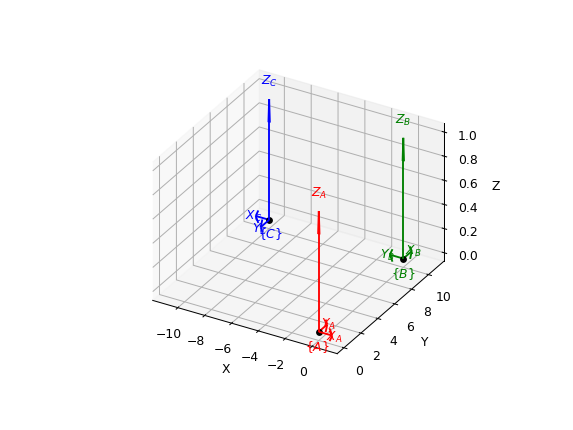

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

In [52]:
trplot(S0.A, color = 'r', frame = "A") # Puede tirar error con dims, colocar [xmin,xmax,ymin,ymax,zmin,zmax]
trplot(S1_eval, color = 'g', frame = "B")
trplot( T_eval, color = 'b', frame='C')